# Introduction to Pol.is Math Python Conversion

This notebook introduces the Python conversion of the Pol.is math codebase. It provides an overview of the components, the conversion process, and how to use these notebooks to explore the system.

## What is Pol.is?

[Pol.is](https://pol.is) is a real-time survey platform that uses data visualization and machine learning to identify patterns in how participants respond to comments. Unlike traditional survey platforms, Pol.is focuses on emergent consensus—identifying areas of agreement across different groups rather than just measuring opinion.

In a Pol.is conversation:
1. Participants can submit short comments
2. All participants vote on comments (agree, disagree, or pass)
3. The system analyzes the voting patterns to identify opinion groups
4. For each group, the system identifies representative comments

This creates a feedback loop that helps communities understand where they agree and disagree.

## The Math Component

The math component is the heart of Pol.is. It performs the following key functions:

1. **Data Structure**: Maintains a vote matrix of participants (rows) and their votes on comments (columns)
2. **Dimensionality Reduction**: Uses Principal Component Analysis (PCA) to project participants into a 2D space based on their voting patterns
3. **Clustering**: Groups participants with similar voting patterns using k-means clustering
4. **Representativeness**: Identifies comments that best represent the opinions of each group
5. **Correlation Analysis**: Finds relationships between comments based on voting patterns
6. **State Management**: Orchestrates the computation and maintains conversation state

The original Pol.is math component was written in Clojure. This Python conversion implements all the same functionality while making it more accessible to a wider community of developers.

## Python Conversion Overview

The Python conversion of the Pol.is math codebase includes:

1. **Core Mathematical Algorithms**:
   - `NamedMatrix` data structure
   - PCA with custom power iteration
   - K-means clustering with weighted means
   - Representativeness calculation
   - Correlation and hierarchical clustering
   - Statistical functions

2. **State Management**:
   - `Conversation` class for state handling
   - `ConversationManager` for multiple conversations

3. **System Components**:
   - Database integration with PostgreSQL
   - Poller for background data retrieval
   - Server with FastAPI endpoints
   - Configuration management
   - System orchestration

The conversion maintains the same mathematical behavior while leveraging Python's ecosystem for improved performance and maintainability.

## Advantages of the Python Implementation

The Python conversion offers several advantages over the original Clojure implementation:

1. **Accessibility**: Python is more widely known and used in data science and web development
2. **Ecosystem Integration**: Seamless integration with NumPy, pandas, SciPy, and other Python data science tools
3. **Performance**: Optimized numerical operations through NumPy and SciPy
4. **Readability**: More familiar syntax and structure for most developers
5. **Maintainability**: Modular organization and comprehensive tests
6. **Type Safety**: Improved type annotations and error handling
7. **Documentation**: Better inline documentation and usage examples

## Project Structure

The Python conversion is organized into the following modules:

```
polismath/
├── __init__.py
├── __main__.py
├── components/
│   ├── __init__.py
│   ├── config.py
│   └── server.py
├── conversation/
│   ├── __init__.py
│   ├── conversation.py
│   └── manager.py
├── database/
│   ├── __init__.py
│   └── postgres.py
├── math/
│   ├── __init__.py
│   ├── named_matrix.py
│   ├── pca.py
│   ├── clusters.py
│   ├── repness.py
│   ├── corr.py
│   └── stats.py
├── poller.py
├── system.py
└── utils/
    ├── __init__.py
    └── general.py
```


## Notebook Series

This series of notebooks explores all aspects of the Pol.is math Python conversion:

1. **[Named Matrix](01_named_matrix.ipynb)**: The core data structure for storing votes
2. **[PCA](02_pca.ipynb)**: Dimensionality reduction for visualization
3. **[Clustering](03_clustering.ipynb)**: Grouping participants by opinion
4. **[Representativeness](04_representativeness.ipynb)**: Finding representative comments
5. **[Correlation](05_correlation.ipynb)**: Analyzing relationships between comments
6. **[Conversation Management](06_conversation.ipynb)**: State handling and updates
7. **[System Integration](07_system_integration.ipynb)**: Database, server, and poller components

Each notebook provides detailed explanations, code examples, and visualizations to help you understand how the components work and how they fit together.

## Getting Started

To run these notebooks, you need to have the Pol.is math Python package installed. The package has been installed in the environment for these notebooks with:

```bash
# Create and activate a virtual environment
python -m venv polis_env
source polis_env/bin/activate

# Install the package in development mode
pip install -e .
```

The package dependencies include:
- NumPy, pandas, and SciPy for numerical operations
- scikit-learn for machine learning algorithms
- FastAPI and uvicorn for the HTTP server
- SQLAlchemy and psycopg2 for database operations
- Matplotlib and seaborn for visualizations in these notebooks

Let's verify that the package is installed correctly:

In [3]:
# Import key components to verify the installation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from polismath.math.named_matrix import NamedMatrix
from polismath.math.pca import pca_project_named_matrix
from polismath.math.clusters import cluster_named_matrix
from polismath.math.repness import conv_repness
from polismath.conversation import Conversation, ConversationManager

print("Pol.is Math Python package successfully imported!")
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

Pol.is Math Python package successfully imported!
NumPy version: 2.2.4
pandas version: 2.2.3


## Example Usage

Here's a minimal example to demonstrate how the core components work together:

In [4]:
# Create a simple vote matrix
participant_ids = ["p1", "p2", "p3", "p4", "p5"]
comment_ids = ["c1", "c2", "c3"]
votes = np.array([
    [ 1,  1, -1],  # p1
    [ 1,  1,  1],  # p2
    [-1, -1,  1],  # p3
    [-1, -1, -1],  # p4
    [ 1, -1,  1]   # p5
])

# Create a NamedMatrix
matrix = NamedMatrix(votes, participant_ids, comment_ids)

# Perform PCA
pca_results, projections = pca_project_named_matrix(matrix)

# Convert projections to a format suitable for clustering
proj_matrix = np.array([projections[pid] for pid in participant_ids])
proj_named_matrix = NamedMatrix(proj_matrix, participant_ids, ["x", "y"])

# Perform clustering
clusters = cluster_named_matrix(proj_named_matrix, k=2)

# Format clusters for representativeness calculation
formatted_clusters = {}
for i, cluster in enumerate(clusters):
    formatted_clusters[str(i)] = cluster

# Calculate representativeness
repness = conv_repness(matrix, formatted_clusters)

# Display results
print("Vote Matrix:")
print(matrix.matrix)
print("\nClusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")
print("\nTop Representative Comments:")
for group_id, comments in repness['group_repness'].items():
    print(f"Group {group_id}:")
    agrees = [c for c in comments if c['repful'] == 'agree']
    disagrees = [c for c in comments if c['repful'] == 'disagree']
    if agrees:
        top_agree = sorted(agrees, key=lambda x: abs(x['repness_z']), reverse=True)[0]
        print(f"  Agree: Comment {top_agree['comment_id']} (z-score: {top_agree['repness_z']:.2f})")
    if disagrees:
        top_disagree = sorted(disagrees, key=lambda x: abs(x['repness_z']), reverse=True)[0]
        print(f"  Disagree: Comment {top_disagree['comment_id']} (z-score: {top_disagree['repness_z']:.2f})")

TypeError: string indices must be integers

## Visualizing the Example

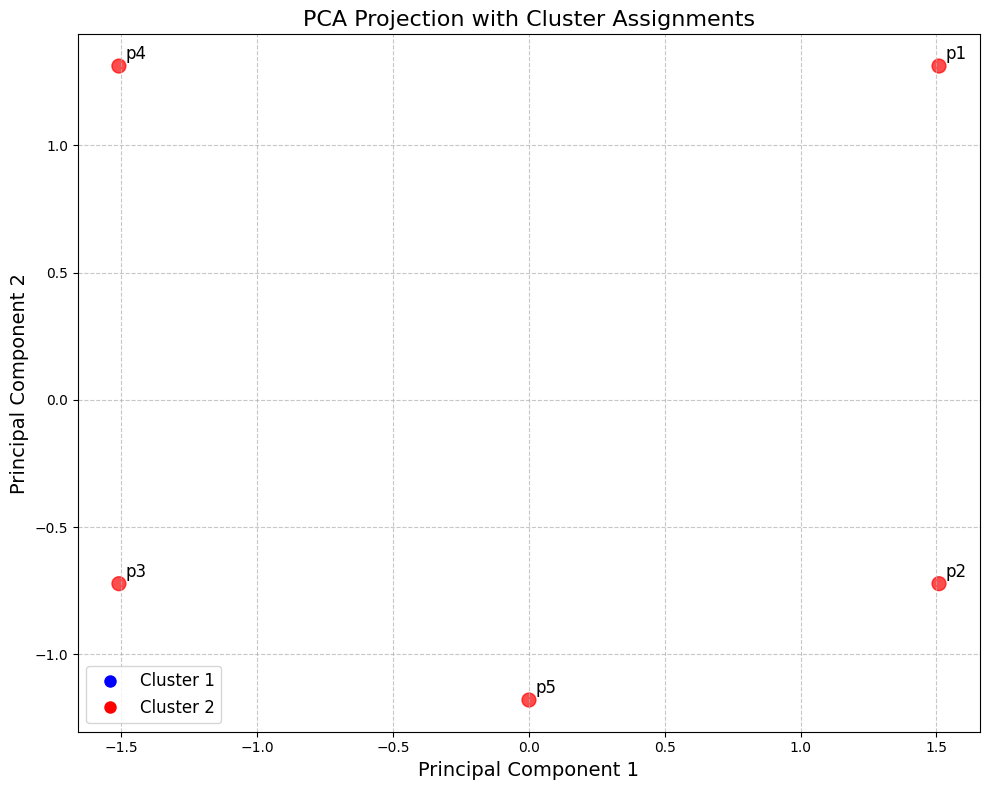

In [5]:
# Extract the projection coordinates and assigned clusters
x_coords = []
y_coords = []
assigned_clusters = []
labels = []

id_to_cluster = {}
for cluster_idx, cluster_members in enumerate(clusters):
    for pid in cluster_members:
        id_to_cluster[pid] = cluster_idx

for p_id in participant_ids:
    if p_id in projections:
        x_coords.append(projections[p_id][0])
        y_coords.append(projections[p_id][1])
        assigned_clusters.append(id_to_cluster.get(p_id, -1))
        labels.append(p_id)

# Create a scatter plot with clusters
plt.figure(figsize=(10, 8))
colors = ['blue' if c == 0 else 'red' for c in assigned_clusters]
plt.scatter(x_coords, y_coords, c=colors, s=100, alpha=0.7)

# Add labels
for i, label in enumerate(labels):
    plt.annotate(label, (x_coords[i], y_coords[i]), fontsize=12, 
                 xytext=(5, 5), textcoords='offset points')

plt.title('PCA Projection with Cluster Assignments', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 2')
]
plt.legend(handles=legend_elements, fontsize=12)

plt.tight_layout()
plt.show()

## Next Steps

Now that you have a basic understanding of how the Pol.is math Python conversion works, you can explore the individual components in more detail using the following notebooks:

1. **[Named Matrix](01_named_matrix.ipynb)**: Learn about the core data structure for storing votes
2. **[PCA](02_pca.ipynb)**: Explore the dimensionality reduction technique for visualization
3. **[Clustering](03_clustering.ipynb)**: Understand how participants are grouped by opinion
4. **[Representativeness](04_representativeness.ipynb)**: See how representative comments are identified
5. **[Correlation](05_correlation.ipynb)**: Analyze relationships between comments
6. **[Conversation Management](06_conversation.ipynb)**: Learn about state handling and updates
7. **[System Integration](07_system_integration.ipynb)**: Understand the database, server, and poller components

These notebooks provide a comprehensive guide to the Pol.is math Python conversion, helping you understand both the mathematical algorithms and the system architecture.